In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets,layers,models
import warnings
warnings.filterwarnings("ignore")

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower',origin=dataset_url,cache_dir='.',untar = True)
#'flower: file name', cache_dir  = '.' means default directory, untar = true means zip file, uzip it 

In [13]:
data_dir

'.\\datasets\\flower'

In [17]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower')

In [20]:
#Get the list of all jpg files in the directory
# */* : Search all the folders inside the flower folder
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower/daisy/10555749515_13a12a026e.jpg'),
 WindowsPath('datasets/flower/daisy/10555815624_dc211569b0.jpg'),
 Wi

In [23]:
# Inside flower folder inside rose folder take all
roses = list(data_dir.glob('roses/*'))
roses[:3]

[WindowsPath('datasets/flower/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower/roses/10503217854_e66a804309.jpg')]

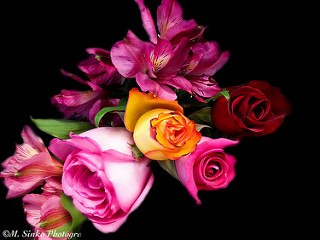

In [25]:
PIL.Image.open((roses[6]))

In [27]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:3]

[WindowsPath('datasets/flower/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower/tulips/10094731133_94a942463c.jpg')]

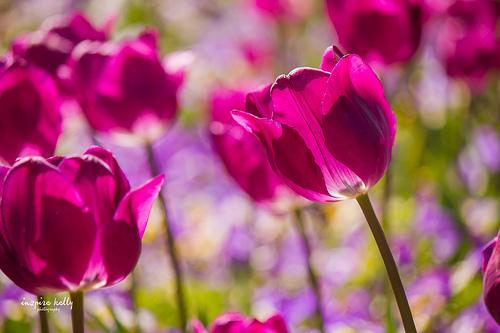

In [28]:
PIL.Image.open((tulips[6]))

# Making The DataSet

In [29]:
flower_dict = {
   'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [30]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

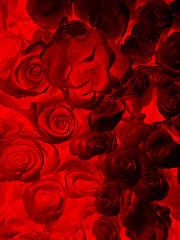

In [32]:
PIL.Image.open(flower_dict['roses'][4])

In [34]:
img = cv2.imread(str(flower_dict['roses'][0]))
img.shape

(240, 179, 3)

In [35]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [38]:
#For understanding the loop
for flower_name,images in flower_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [39]:
x = []
y = []
for flower_name,images in flower_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img,(180,180))
        x.append(resize_img)
        y.append(flower_labels_dict[flower_name])

In [43]:
x = np.array(x)
y = np.array(y)

In [42]:
np.unique(y)

array([0, 1, 2, 3, 4])

# MODEL

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [45]:
x_train = x_train / 255
x_test = x_test / 255

In [51]:
cnn = models.Sequential([
    layers.Conv2D(filters=16,padding='SAME',kernel_size=(3,3),activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,padding='SAME',kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,padding='SAME',kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    
    
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='softmax')
])



cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 28s 324ms/step - loss: 1.5615 - accuracy: 0.4066
Epoch 2/10
86/86 [==============================] - 27s 314ms/step - loss: 1.1359 - accuracy: 0.5283
Epoch 3/10
86/86 [==============================] - 21s 245ms/step - loss: 1.0077 - accuracy: 0.6072
Epoch 4/10
86/86 [==============================] - 19s 226ms/step - loss: 0.8887 - accuracy: 0.6653
Epoch 5/10
86/86 [==============================] - 23s 268ms/step - loss: 0.7591 - accuracy: 0.7078
Epoch 6/10
86/86 [==============================] - 21s 239ms/step - loss: 0.6463 - accuracy: 0.7642
Epoch 7/10
86/86 [==============================] - 19s 218ms/step - loss: 0.5223 - accuracy: 0.8125
Epoch 8/10
86/86 [==============================] - 19s 226ms/step - loss: 0.3859 - accuracy: 0.8695
Epoch 9/10
86/86 [==============================] - 19s 216ms/step - loss: 0.2672 - accuracy: 0.9092
Epoch 10/10
86/86 [==============================] - 19s 224ms/step - loss: 0.2085 - accura

In [59]:
cnn.evaluate(x_train,y_train)

86/86 [==============================] - 4s 44ms/step - loss: 0.1383 - accuracy: 0.9633


[0.13829852640628815, 0.9632993936538696]

In [60]:
#Overfitting 
cnn.evaluate(x_test,y_test)

29/29 [==============================] - 2s 51ms/step - loss: 1.3324 - accuracy: 0.6449


[1.3324438333511353, 0.6448801755905151]

In [65]:
ypred = cnn.predict(x_test)
ypred = [np.argmax(i) for i in ypred]
ypred[:5]

29/29 [==============================] - 1s 49ms/step


[1, 4, 2, 0, 2]

In [63]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, ypred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.74      0.62       176
           1       0.58      0.65      0.61       154
           2       0.80      0.62      0.70       226
           3       0.71      0.77      0.74       150
           4       0.65      0.50      0.56       212

    accuracy                           0.64       918
   macro avg       0.65      0.66      0.65       918
weighted avg       0.66      0.64      0.64       918



# Train the model using data augmentation and a drop out layer

In [91]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.5),
])

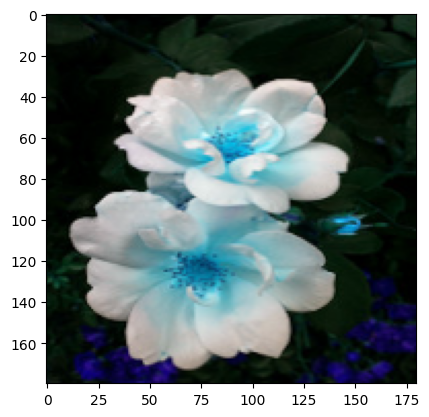

In [92]:
plt.imshow(x[0])

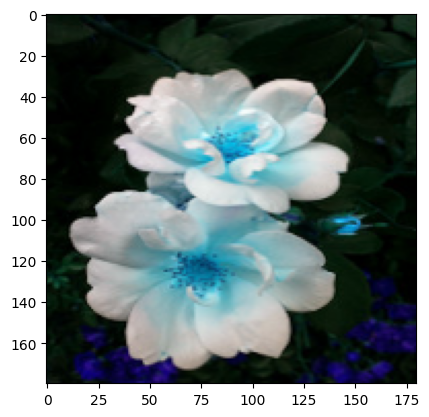

In [93]:
a = np.array(data_aug(x)).astype('uint8')
plt.imshow(a[0])

In [94]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


In [95]:
cnn = models.Sequential([
    data_augmentation,
    
    layers.Conv2D(filters=16,padding='SAME',kernel_size=(3,3),activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,padding='SAME',kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,padding='SAME',kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    
    
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32,activation='softmax')
])



cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 30s 327ms/step - loss: 1.8936 - accuracy: 0.3230
Epoch 2/10
86/86 [==============================] - 30s 346ms/step - loss: 1.3477 - accuracy: 0.4499
Epoch 3/10
86/86 [==============================] - 29s 339ms/step - loss: 1.2375 - accuracy: 0.4855
Epoch 4/10
86/86 [==============================] - 29s 340ms/step - loss: 1.1303 - accuracy: 0.5312
Epoch 5/10
86/86 [==============================] - 30s 352ms/step - loss: 1.0713 - accuracy: 0.5687
Epoch 6/10
86/86 [==============================] - 33s 387ms/step - loss: 1.0377 - accuracy: 0.5843
Epoch 7/10
86/86 [==============================] - 35s 411ms/step - loss: 0.9902 - accuracy: 0.5988
Epoch 8/10
86/86 [==============================] - 33s 389ms/step - loss: 0.9589 - accuracy: 0.6134
Epoch 9/10
86/86 [==============================] - 30s 350ms/step - loss: 0.9303 - accuracy: 0.6323
Epoch 10/10
86/86 [==============================] - 29s 341ms/step - loss: 0.8810 - accura

In [97]:
cnn.evaluate(x_train,y_train)

86/86 [==============================] - 5s 52ms/step - loss: 0.8545 - accuracy: 0.6646


[0.8545091152191162, 0.664607584476471]

In [96]:
cnn.evaluate(x_test,y_test) #No overfitting 

29/29 [==============================] - 1s 47ms/step - loss: 0.9519 - accuracy: 0.6416


[0.9519259333610535, 0.64161217212677]

In [98]:
ypred = cnn.predict(x_test)
ypred = [np.argmax(i) for i in ypred]
ypred[:5]

29/29 [==============================] - 2s 52ms/step


[1, 4, 2, 4, 2]

In [99]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, ypred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.48      0.53       176
           1       0.83      0.44      0.58       154
           2       0.71      0.69      0.70       226
           3       0.62      0.90      0.73       150
           4       0.57      0.69      0.62       212

    accuracy                           0.64       918
   macro avg       0.66      0.64      0.63       918
weighted avg       0.66      0.64      0.63       918

